# MoodCoin 모델링

In [0]:
!pip install numpy==1.16.2
!pip install keras --upgrade
!pip install tensorflow --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
from google.colab import drive
import numpy as np

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import pickle

class Data():
    def __init__(self, maxlen=20):
        # X = np.load('/content/gdrive/My Drive/project/MoodCoin/X_data.npy')
        # Y = np.load('/content/gdrive/My Drive/project/MoodCoin/Y_data.npy')

        with open('/content/gdrive/My Drive/project/MoodCoin/x_data.pickle', 'rb') as f:
            X = np.array(pickle.load(f))
        with open('/content/gdrive/My Drive/project/MoodCoin/y_data.pickle', 'rb') as f:
            Y = np.array(pickle.load(f))

        # print(set(Y))

        X = pad_sequences(X, maxlen=maxlen)
        Y = to_categorical(Y).astype(int)

        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        Y = Y[s]

        X_train = X[:-500]
        Y_train = Y[:-500]
        X_test = X[-500:]
        Y_test = Y[-500:]

        self.shape = X_train.shape[1:]
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.max_features = 5002 # 0은 패딩, 1은 없는 단어이므로 2를 추가.

        self.class_number = len(self.Y_test[0])

In [0]:
from keras import layers
from keras.models import Sequential

def build_model(input_size, max_features, output_size):
    m = Sequential()
    m.add(layers.Embedding(max_features, 32, input_shape=input_size))
    m.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    
    m.add(layers.Dense(16, activation='relu'))
    m.add(layers.Dropout(0.5))
    m.add(layers.Dense(output_size, activation='softmax'))

    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return m

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, yname, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    if yname == 'acc':
        plt.plot(history['accuracy']) # 선 그리기
        plt.plot(history['val_accuracy'])
        plt.ylabel('Accuracy') # y축 이름 표시
    else:
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.ylabel('Loss') # y축 이름 표시
        
    if title is not None:
        plt.title(title) # 그래프 제목 표시
    
    plt.xlabel('Epoch') # x축 이름 표시
    plt.legend(['Training', 'Verification'], loc=0) # 각 라인의 표식 표시
    plt.show()

In [0]:
data = Data()
models = [[build_model(data.shape, data.max_features, data.class_number), ] for _ in range(5)]
for i in range(len(models)):
    history = models[i][0].fit(data.X_train, data.Y_train, batch_size=5, epochs=3, validation_split=0.2)
    models[i].append(models[i][0].evaluate(data.X_test, data.Y_test)[1])

model, score = max(models, key=lambda l: l[1])
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.0845 - accuracy: 0.7529 - val_loss: 0.9320 - val_accuracy: 0.7551
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9493 - accuracy: 0.7621 - val_loss: 0.8835 - val_accuracy: 0.7551
Epoch 3/3
500/500 [==============================] - 0s 137us/step


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.0821 - accuracy: 0.7488 - val_loss: 0.9204 - val_accuracy: 0.7551
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9244 - accuracy: 0.7621 - val_loss: 0.8838 - val_accuracy: 0.7551
Epoch 3/3
500/500 [==============================] - 0s 140us/step


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.1088 - accuracy: 0.7320 - val_loss: 0.9454 - val_accuracy: 0.7551
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9275 - accuracy: 0.7632 - val_loss: 0.8804 - val_accuracy: 0.7551
Epoch 3/3
500/500 [==============================] - 0s 139us/step


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.1036 - accuracy: 0.7218 - val_loss: 0.9276 - val_accuracy: 0.7551
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9355 - accuracy: 0.7621 - val_loss: 0.8832 - val_accuracy: 0.7551
Epoch 3/3
500/500 [==============================] - 0s 147us/step


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.0708 - accuracy: 0.7515 - val_loss: 0.9261 - val_accuracy: 0.7551
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9431 - accuracy: 0.7621 - val_loss: 0.8752 - val_accuracy: 0.7551
Epoch 3/3
500/500 [==============================] - 0s 133us/step
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 20, 32)            160064    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_33 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)          

In [0]:
history = model.fit(data.X_train, data.Y_train, batch_size=5, epochs=3, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2922 samples, validate on 731 samples
Epoch 1/3
2922/2922 [==============================] - 8s 3ms/step - loss: 1.0878 - accuracy: 0.7266 - val_loss: 0.9387 - val_accuracy: 0.7387
Epoch 2/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.9185 - accuracy: 0.7690 - val_loss: 0.9110 - val_accuracy: 0.7387
Epoch 3/3
2922/2922 [==============================] - 8s 3ms/step - loss: 0.7642 - accuracy: 0.7782 - val_loss: 0.9703 - val_accuracy: 0.7483


In [0]:
# score = model.evaluate(data.X_test, data.Y_test)
# print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))
score

0.7699999809265137

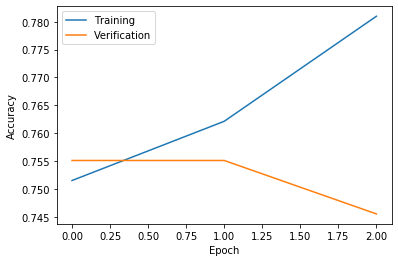

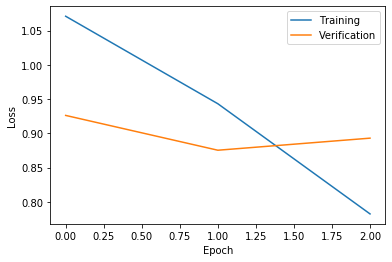

In [0]:
plot_graph(history, 'acc')
plot_graph(history, 'loss')

In [0]:
model.save('/content/gdrive/My Drive/project/MoodCoin/model.h5')

In [0]:
# d = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4], [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0, 706,  34, 151], [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0,   0,   2, 151], [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0, 354, 701,   2]])

emotion = ['감정 없음', '기쁨', '분노', '불안', '슬픔', '짜증']
s = np.arange(data.X_train.shape[0])
np.random.shuffle(s)
print(s[:10])
d = data.X_train[s[:10]]
y = data.Y_train[s[:10]]

print([emotion[np.argmax(pred)] for pred in model.predict(d)])
print([np.argmax(Y) for Y in y])

[2397 2857 1104 1863 2086 3317  845 2990  301 1797]
['감정 없음', '감정 없음', '기쁨', '기쁨', '감정 없음', '감정 없음', '감정 없음', '감정 없음', '감정 없음', '감정 없음']
[0, 0, 1, 1, 2, 0, 4, 0, 0, 0]
